In [6]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 22.5 MB/s eta 0:00:00


In [7]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [51]:
! ls ../Exps/GAN_PI

GAN_PI_1		   GAN_PI_low_stochastic  GAN_PI_w_1  GAN_PI_w_l3
GAN_PI_enforce_supervised  GAN_PI_red		  GAN_PI_w_2


In [9]:
root="../Exps/GAN_PI"

In [80]:
model_id="GAN_PI_enforce_supervised"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

EOFError: No data left in file

In [72]:
hist[1]["train"]["discriminative_losses"]

[{'generative_entropy_loss': tensor(0.9429),
  'generative_posterior_loss': tensor(3.2205),
  'PDE_residual_loss': tensor(0.8641),
  'PDE_supervised_loss': tensor(2.2755),
  'Discriminator_loss': tensor(33.6873),
  'Generator_loss': tensor(1.7693),
  'total_loss': tensor(42.7597)},
 {'generative_entropy_loss': tensor(0.9685),
  'generative_posterior_loss': tensor(3.1976),
  'PDE_residual_loss': tensor(1.0935),
  'PDE_supervised_loss': tensor(4.5132),
  'Discriminator_loss': tensor(35.6265),
  'Generator_loss': tensor(3.2227),
  'total_loss': tensor(48.6220)},
 {'generative_entropy_loss': tensor(0.9588),
  'generative_posterior_loss': tensor(3.1863),
  'PDE_residual_loss': tensor(1.1930),
  'PDE_supervised_loss': tensor(7.6334),
  'Discriminator_loss': tensor(37.9843),
  'Generator_loss': tensor(5.1787),
  'total_loss': tensor(56.1344)},
 {'generative_entropy_loss': tensor(0.9515),
  'generative_posterior_loss': tensor(3.1783),
  'PDE_residual_loss': tensor(1.3703),
  'PDE_supervised_lo

In [73]:
list(hist[1]["train"]["generative_losses"][0].keys())

['generative_entropy_loss',
 'generative_posterior_loss',
 'PDE_residual_loss',
 'PDE_supervised_loss',
 'Discriminator_loss',
 'Generator_loss',
 'total_loss']

In [74]:
step_loss={}

In [75]:
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

#step_loss=list(
#    reduce(lambda x,y:x+y,list(b["Generator_loss"] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
#)

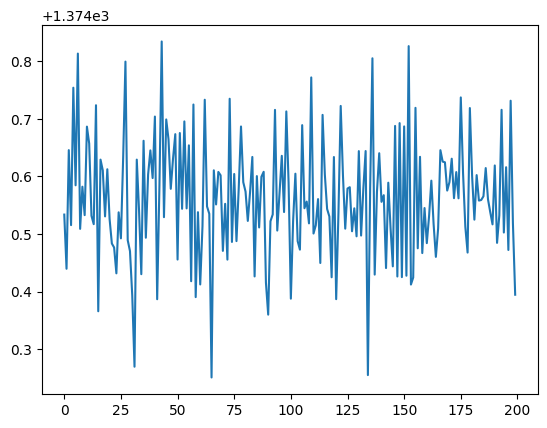

In [76]:
fig,axs=plt.subplots()
axs.plot(np.arange(len(step_loss["PDE_supervised_loss"][-200:])),step_loss["PDE_supervised_loss"][-200:])
#axs_=axs.twinx()
#axs_.plot(np.arange(len(step_loss["PDE_supervised_loss"][:])),step_loss["total_loss"][:])
#axs_=axs.twinx()
#axs_.plot(np.arange(len(step_loss["PDE_supervised_loss"][:])),step_loss["PDE_residual_loss"][:])
#fig.tight_layout()
plt.show()

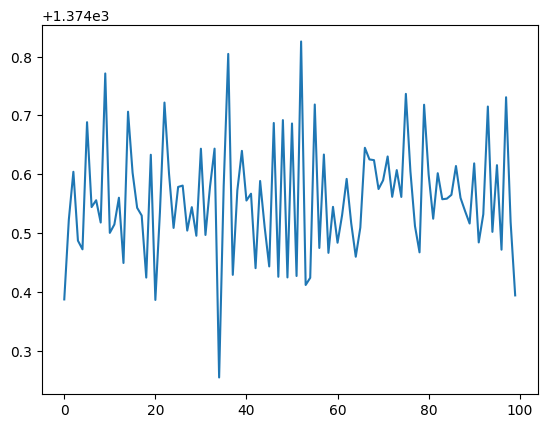

In [77]:

plt.plot(step_loss["PDE_supervised_loss"][-100:])